# Cricket ODI Match predictor 

## Khyati Chaturvedi

Implement the  a sports game predictor using any two machine learning algorithms and compare them.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import os
print(os.listdir("/Users/KHYATI/Documents"))

['.RData', '.Rhistory', '19BCI0124_EXP7.docx', 'a.sql', 'Adobe', 'AndroidStudio', 'bank-full.csv', 'bank.csv', 'banking.csv', 'breast-cancer-wisconsin.data', 'cache', 'Cars.csv', 'Cars.xlsx', 'Cleaned-Data.csv', 'companyData.csv', 'ContinousDataset.csv', 'CSE 2003.docx', 'CSE 200319BCI0124_LIVECODINGTEST.pdf', 'CSE1004_NETWORK-AND-COMMUNICATION_ETH_1.1_47_CSE1004.pdf', 'CSE2005_OPERATING-SYSTEMS_ETH_1.0_37_CSE2005.pdf', 'Custom Office Templates', 'DA.sql', 'DAS.sql', 'Desktop - Shortcut.lnk', 'desktop.ini', 'diabetes-data.tar.Z', 'diabetes.csv', 'Downloads', 'employees.csv', 'EXPERIMENT 4.pdf', 'flask_app', 'git_test', 'hello.java', 'IISExpress', 'img20200711_13200908.pdf', 'iSeePassword Dr.PDF', 'javalabda3.pdf', 'L13_14_19BCI0124_LABFAT_2005.pdf', 'LabDA1.ipynb', 'letter-recognition.data', 'lo.sql', 'lol.html', 'lung-cancer.data', 'mba.csv', 'mba.xlsx', 'My Music', 'My Pictures', 'My Videos', 'My Web Sites', 'NightTimeSheep', 'notePimaIndians.txt', 'Promote Application Data', 'Python

In [3]:
data = pd.read_csv("/Users/KHYATI/Documents/ContinousDataset.csv")

In [4]:
data.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [5]:
labels = data[['Winner']]
data = data[['Team 1', 'Team 2', 'Ground', 'Host_Country', 'Venue_Team1', 'Venue_Team2', 'Innings_Team1', 'Innings_Team2']]

In [6]:
data.head()

,Team 1,Team 2,Ground,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,Australia,England,Melbourne,Australia,Home,Away,Second,First
1,England,Australia,Manchester,England,Home,Away,Second,First
2,England,Australia,Lord's,England,Home,Away,First,Second
3,England,Australia,Birmingham,England,Home,Away,Second,First
4,New Zealand,Pakistan,Christchurch,New Zealand,Home,Away,First,Second


In [7]:
data_hot = pd.get_dummies(data)

In [8]:
data_hot.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_Bermuda,Team 1_Canada,Team 1_East Africa,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,...,Venue_Team1_Away,Venue_Team1_Home,Venue_Team1_Neutral,Venue_Team2_Away,Venue_Team2_Home,Venue_Team2_Neutral,Innings_Team1_First,Innings_Team1_Second,Innings_Team2_First,Innings_Team2_Second
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels) 
# labels = pd.get_dummies(labels)

C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_hot, labels, test_size=0.1)

## Decision Tree 

In [11]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [12]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
DTC.score(x_test, y_test)

0.6133333333333333

In [13]:
params = {
    "criterion":["gini", "entropy"],
    "max_depth":[15,20,25], 
}
dtc = DecisionTreeClassifier()
dtc_reg = GridSearchCV(dtc, params, cv=10, n_jobs=10)
dtc_reg.fit(x_train, y_train)
print(dtc_reg.best_estimator_)

C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=25)


In [14]:
dtc_tune = DecisionTreeClassifier(max_depth=15)
dtc_tune.fit(x_train, y_train)
score = cross_val_score(dtc_tune, x_test, y_test, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score.mean())

0.5133333333333334


In [15]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
y_pred_gini = clf_gini.predict(x_test)
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([ 1, 15, 15, ..., 15,  1, 15])

In [17]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.2920


In [18]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.3038


In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.3038
Test set score: 0.2920


[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.899\nsamples = 6744\nvalue = [75, 996, 190, 12, 28, 1, 629, 10, 854, 91, 76, 2\n49, 575, 10, 839, 56, 653, 659, 13, 2, 689, 235]'),
 Text(0.25, 0.625, 'X[24] <= 0.5\ngini = 0.902\nsamples = 5958\nvalue = [75, 490, 189, 12, 28, 1, 578, 10, 813, 91, 76, 2\n49, 541, 10, 811, 56, 615, 630, 13, 2, 633, 233]'),
 Text(0.125, 0.375, 'X[17] <= 0.5\ngini = 0.893\nsamples = 5196\nvalue = [75, 0, 188, 12, 28, 1, 532, 10, 775, 91, 76, 2\n49, 505, 10, 782, 56, 574, 603, 13, 2, 581, 231]'),
 Text(0.0625, 0.125, 'gini = 0.891\nsamples = 4767\nvalue = [75, 0, 185, 12, 28, 1, 509, 10, 747, 91, 76, 2\n49, 484, 10, 759, 56, 283, 579, 13, 2, 567, 229]'),
 Text(0.1875, 0.125, 'gini = 0.523\nsamples = 429\nvalue = [0, 0, 3, 0, 0, 0, 23, 0, 28, 0, 0, 0, 0, 21\n0, 23, 0, 291, 24, 0, 0, 14, 2]'),
 Text(0.375, 0.375, 'X[21] <= 0.5\ngini = 0.568\nsamples = 762\nvalue = [0, 490, 1, 0, 0, 0, 46, 0, 38, 0, 0, 0, 0\n36, 0, 29, 0, 41, 27, 0, 0, 52, 2]'),
 Text(0.3125, 0.125, 'g

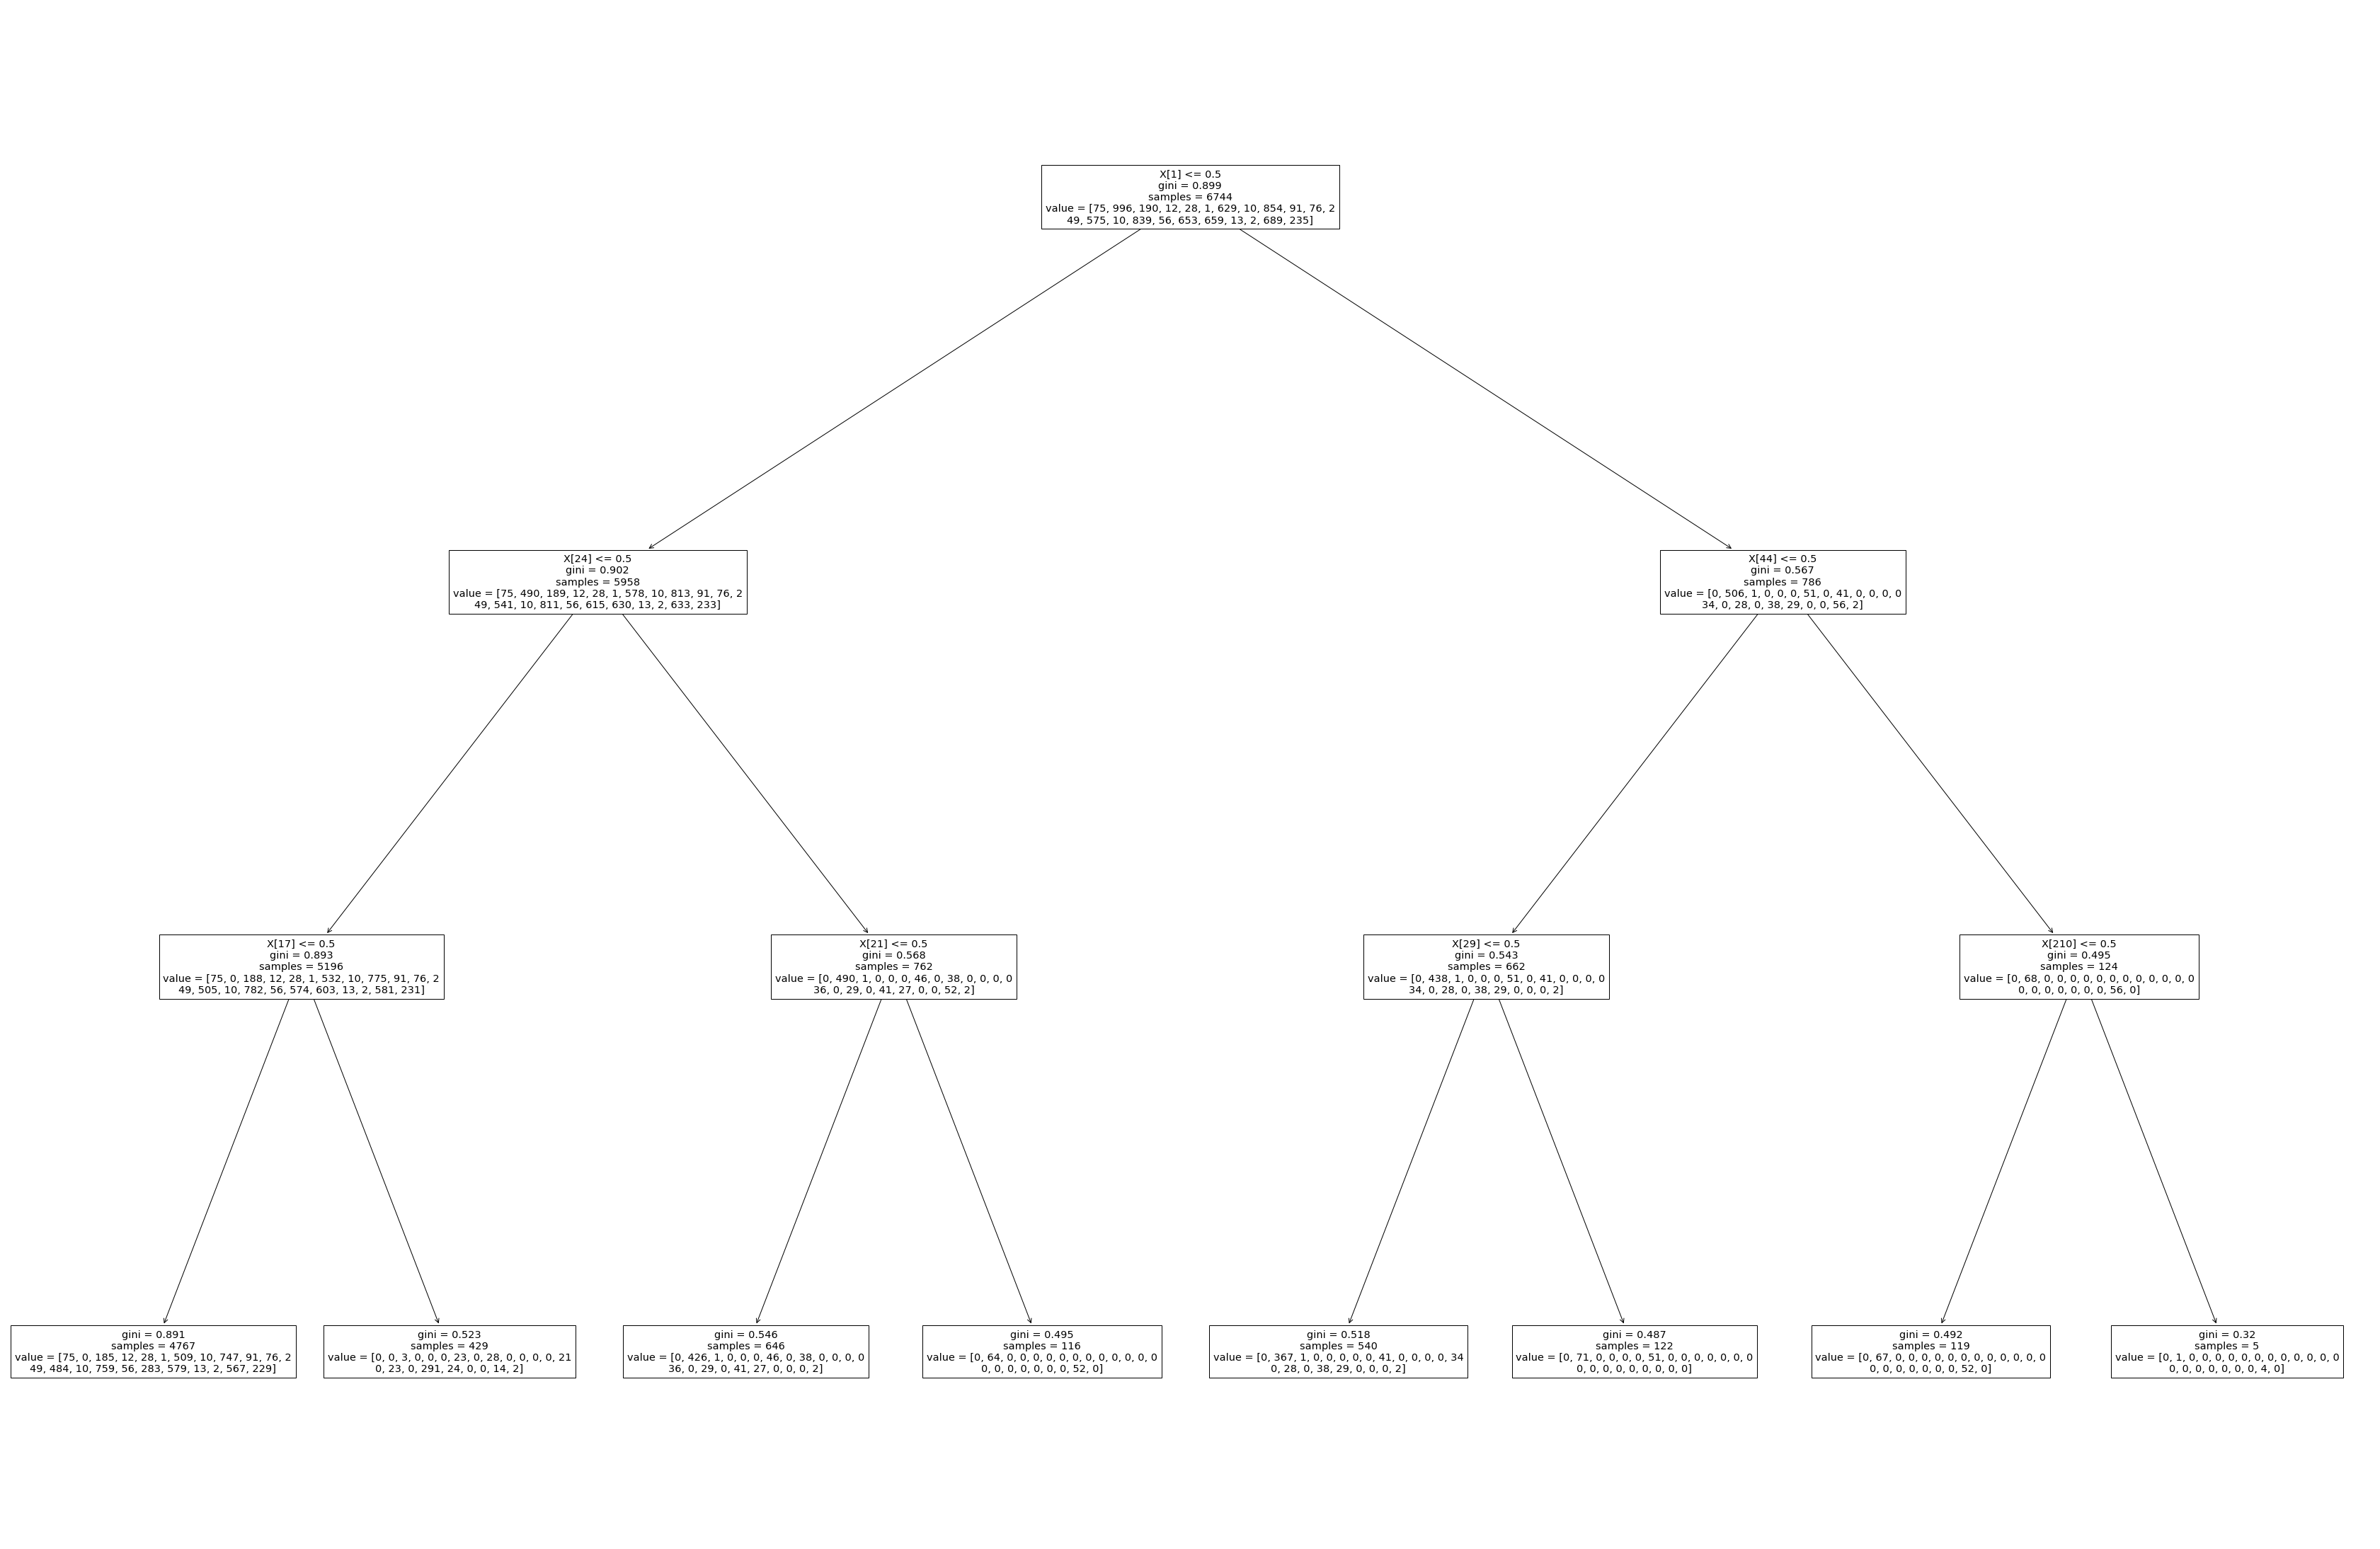

In [20]:

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,40))

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [21]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [22]:
y_pred_en = clf_en.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.2920


In [24]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([ 1, 15, 15, ..., 15,  1, 15])

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.3037


In [26]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.3037
Test set score: 0.2920


[Text(0.5, 0.875, 'X[1] <= 0.5\nentropy = 3.526\nsamples = 6744\nvalue = [75, 996, 190, 12, 28, 1, 629, 10, 854, 91, 76, 2\n49, 575, 10, 839, 56, 653, 659, 13, 2, 689, 235]'),
 Text(0.25, 0.625, 'X[24] <= 0.5\nentropy = 3.573\nsamples = 5958\nvalue = [75, 490, 189, 12, 28, 1, 578, 10, 813, 91, 76, 2\n49, 541, 10, 811, 56, 615, 630, 13, 2, 633, 233]'),
 Text(0.125, 0.375, 'X[17] <= 0.5\nentropy = 3.464\nsamples = 5196\nvalue = [75, 0, 188, 12, 28, 1, 532, 10, 775, 91, 76, 2\n49, 505, 10, 782, 56, 574, 603, 13, 2, 581, 231]'),
 Text(0.0625, 0.125, 'entropy = 3.469\nsamples = 4767\nvalue = [75, 0, 185, 12, 28, 1, 509, 10, 747, 91, 76, 2\n49, 484, 10, 759, 56, 283, 579, 13, 2, 567, 229]'),
 Text(0.1875, 0.125, 'entropy = 1.783\nsamples = 429\nvalue = [0, 0, 3, 0, 0, 0, 23, 0, 28, 0, 0, 0, 0, 21\n0, 23, 0, 291, 24, 0, 0, 14, 2]'),
 Text(0.375, 0.375, 'X[21] <= 0.5\nentropy = 1.954\nsamples = 762\nvalue = [0, 490, 1, 0, 0, 0, 46, 0, 38, 0, 0, 0, 0\n36, 0, 29, 0, 41, 27, 0, 0, 52, 2]'),
 Text

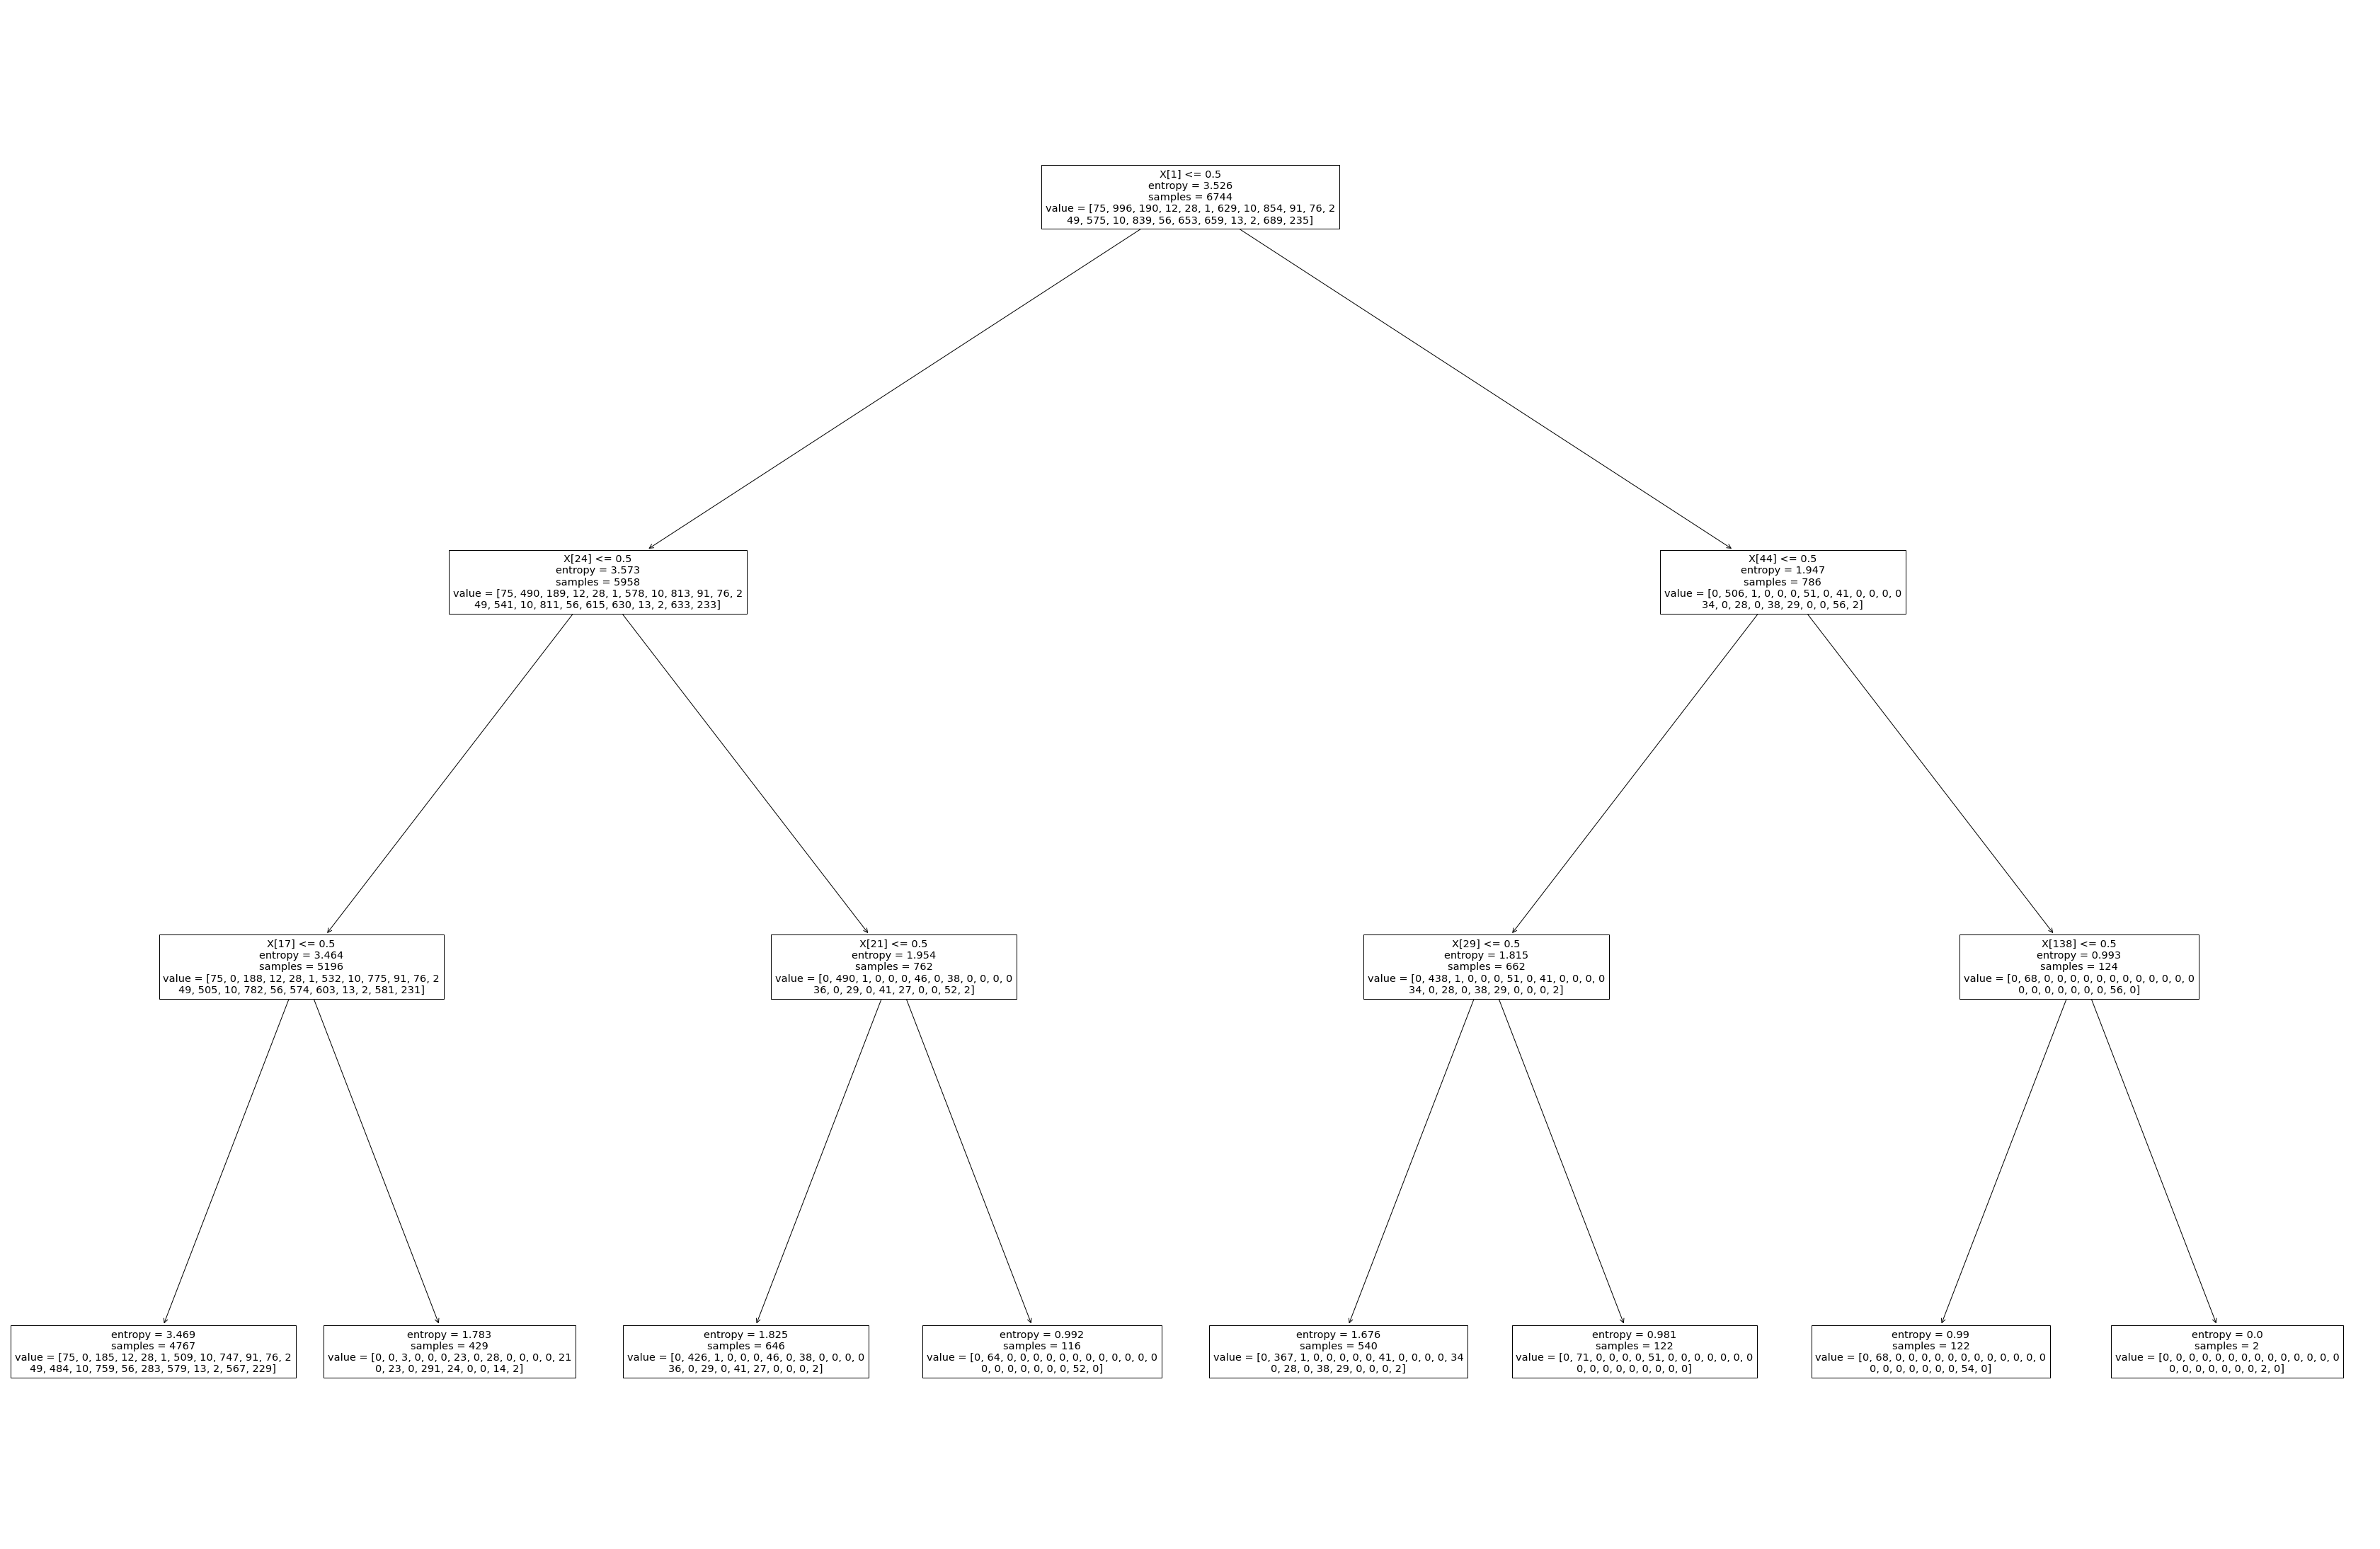

In [27]:
plt.figure(figsize=(60,40))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train)) 

In [28]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   9   0   0   0   0
    0   0]
 [  0 108   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  20   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   6   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   7   0   0   0   0   0   0   0   0   0   0   0  47   0   3   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
    0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0  84   0   1   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  11   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   8   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.64      1.00      0.78       108
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        57
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        96
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        73
          15       0.16      0.92      0.27        93
          16       0.00      0.00      0.00         6
          17       0.62      0.36      0.46        69
          18       0.00      0.00      0.00        83
          19       0.00    

C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_en)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   9   0   0   0   0
    0   0]
 [  0 108   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  20   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   6   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   7   0   0   0   0   0   0   0   0   0   0   0  47   0   3   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
    0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0  84   0   1   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  11   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   8   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   

## Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logreg.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [32]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix1)

[[ 5  0  0  0  0  0  0  0  0  2  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 96  0  0  0  0  2  0  3  0  0  0  0  0  0  0  0  5  0  0  2  0]
 [ 0  0 11  0  0  0  1  0  1  0  0  0  0  2  0  1  0  0  2  0  0  2]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  2  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0 43  0  2  0  0  0  0  1  0  1  0  1  1  0  2  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  7  0  0  0  0  1  0 58  0  0  0  0  3  0  7  0  7  4  0  9  0]
 [ 1  0  1  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  1  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  8  0  5  0  0  0  0 40  0  4  0  2  6  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.67      0.89      0.76       108
           2       0.61      0.55      0.58        20
           3       0.50      0.50      0.50         2
           4       0.67      0.33      0.44         6
           5       0.00      0.00      0.00         1
           6       0.59      0.75      0.66        57
           7       1.00      0.50      0.67         2
           8       0.65      0.60      0.63        96
           9       0.80      0.73      0.76        11
          10       0.71      0.62      0.67         8
          11       0.00      0.00      0.00         0
          12       0.78      1.00      0.88         7
          13       0.80      0.55      0.65        73
          14       0.00      0.00      0.00         0
          15       0.67      0.67      0.67        93
          16       0.75      0.50      0.60         6
          17       0.67    

C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\

# Comparision of the two models

## Classification Report of DecisionTree 

In [35]:
print("Confusion Matrix")
print(cm1)
print("Classification report of Decision Tree Model")
print(classification_report(y_test, y_pred_en))

Confusion Matrix
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   9   0   0   0   0
    0   0]
 [  0 108   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  20   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   6   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   7   0   0   0   0   0   0   0   0   0   0   0  47   0   3   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
    0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0  84   0   1   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  11   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   8   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   

C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classification Report of Logistic Regression 

In [36]:
print("Confusion Matrix")
print(confusion_matrix1)
print("Classification report of Logistic Regression Model")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[ 5  0  0  0  0  0  0  0  0  2  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 96  0  0  0  0  2  0  3  0  0  0  0  0  0  0  0  5  0  0  2  0]
 [ 0  0 11  0  0  0  1  0  1  0  0  0  0  2  0  1  0  0  2  0  0  2]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  2  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0 43  0  2  0  0  0  0  1  0  1  0  1  1  0  2  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  7  0  0  0  0  1  0 58  0  0  0  0  3  0  7  0  7  4  0  9  0]
 [ 1  0  1  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  1  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  8  0  5  0  0  0  0 40  0  4  0  2  6  0  1  0]
 [ 0  0  0  0  0 

C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KHYATI\anaconda3\lib\site-packages\sklearn\metrics\